# Price Optimizaiton based on price elasticity of Demand

# Price Elasticity

# EDA - Sell Dataset

In [5]:
# Imoprt the required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [22]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#  Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [8]:
# Display all rows and columns of a dataframe instead of truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [16]:
sold = pd.read_csv('data/Cafe_Sell_Meta_Data.csv')
transcation = pd.read_csv('data/Cafe_Transaction_Store.csv')
date_info = pd.read_csv('data/Cafe_DateInfo.csv')

In [29]:
sold.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [23]:
sold.describe()
sold.describe(include = ['O'])

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [26]:
sold[sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


SELL_ID: a categorical variable, idenitifier of the combination of items that is contained in the product

SELL_CATEGORY: "0" identifies single products; "2" identiifies the combination of products

ITEM_ID: a categorical variable, identifier of the item that is contained in the product

ITEM_NAME: a categorical variale, identifying the name of the item

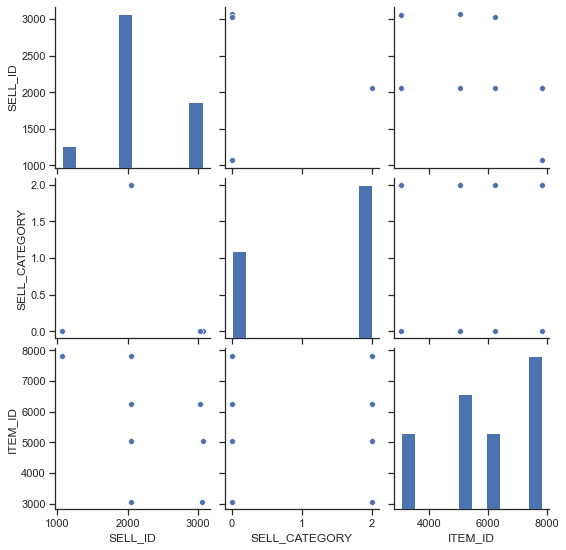

In [27]:
sns.pairplot(sold)

# EDA Transaction

In [30]:
transcation.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [31]:
transcation.describe()
transcation.describe(include = ['O'])

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [36]:
transcation[transcation.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


Impotant: It is assumed the PRICE for that product in that day will not vary

In details:

CALENDER_DATE: a date/time variable, haveing the time always set to 00:00 AM

PRICE: a numeric variable, associated with the price of the product indentified by the SELL_ID

QUANTITY: a numeric variable, associated with the quantity of the product sold, identified by the SELL_ID

SELL_ID: a categorical variable, identifier of the product sold

SELL_CATEGORY: a categorical variable, category of the product sold

(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

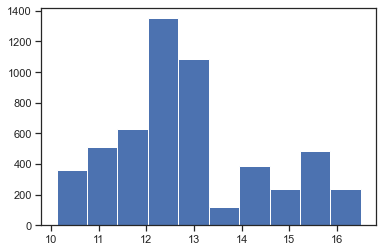

In [37]:
plt.hist(transcation.PRICE)

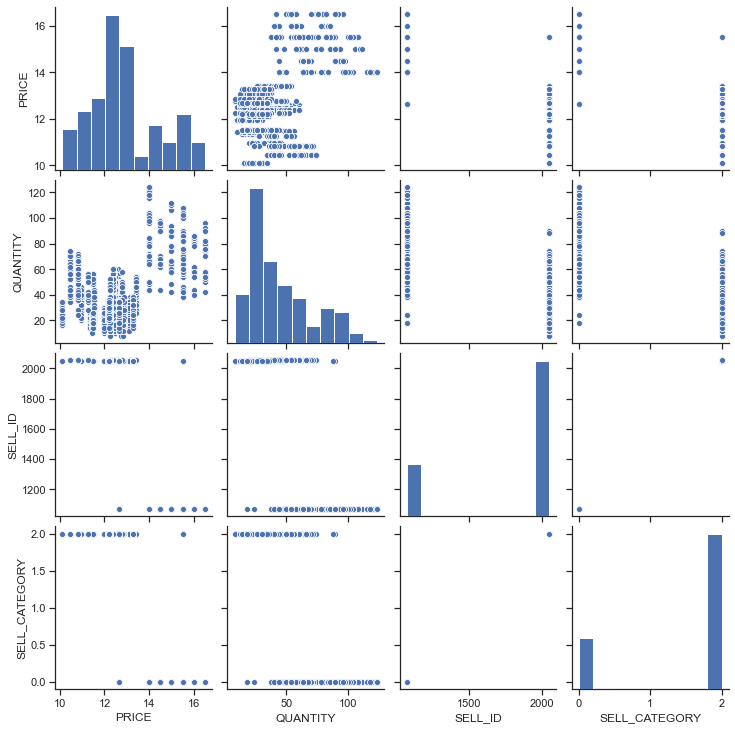

In [38]:
sns.pairplot(transcation)

# EDA Data Info